In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [2]:
##zipcodes = gpd.read_file('../data/zipcodes.geojson')
#print(zipcodes.crs)
##zipcodes.head( )

better_health = gpd.read_file('../data/Better_Health_Data_2024_release_20241202.geojson')
##print(better_health)
better_health

,measure,low_confidence_limit,data_value_unit,data_value,short_question_text,statedesc,totalpop18plus,locationid,year,high_confidence_limit,...,data_value_footnote,data_value_type,data_value_footnote_symbol,locationname,category,datavaluetypeid,measureid,datasource,totalpopulation,geometry
0,Diagnosed diabetes among adults,11.8,%,12.0,Diabetes,United States,260836730,59,2022,12.2,...,None,Crude prevalence,None,None,Health Outcomes,CrdPrv,DIABETES,BRFSS,333287557,None
1,Hearing disability among adults,8.5,%,9.6,Hearing Disability,Alabama,19675,01005,2022,10.7,...,None,Crude prevalence,None,Barbour,Disability,CrdPrv,HEARING,BRFSS,24706,POINT (-85.39281 31.86982)
2,Stroke among adults,3.4,%,3.7,Stroke,Alabama,91336,01015,2022,4.0,...,None,Age-adjusted prevalence,None,Calhoun,Health Outcomes,AgeAdjPrv,STROKE,BRFSS,115788,POINT (-85.82577 33.77149)
3,Stroke among adults,5.1,%,5.6,Stroke,Alabama,27025,01017,2022,6.0,...,None,Crude prevalence,None,Chambers,Health Outcomes,CrdPrv,STROKE,BRFSS,34088,POINT (-85.39176 32.91417)
4,Stroke among adults,4.9,%,5.3,Stroke,Alabama,11235,01027,2022,5.7,...,None,Crude prevalence,None,Clay,Health Outcomes,CrdPrv,STROKE,BRFSS,14198,POINT (-85.86066 33.26931)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240881,High blood pressure among adults,29.9,%,34.3,High Blood Pressure,Wisconsin,36755,55095,2021,38.8,...,None,Crude prevalence,None,Polk,Health Outcomes,CrdPrv,BPHIGH,BRFSS,45709,POINT (-92.44128 45.46151)
240882,Depression among adults,20.9,%,24.5,Depression,Wisconsin,23116,55121,2022,28.2,...,None,Age-adjusted prevalence,None,Trempealeau,Health Outcomes,AgeAdjPrv,DEPRESSION,BRFSS,30899,POINT (-91.35842 44.30395)
240883,Visited dentist or dental clinic in the past y...,60.1,%,64.3,Dental Visit,Wisconsin,25807,55029,2022,67.8,...,None,Age-adjusted prevalence,None,Door,Prevention,AgeAdjPrv,DENTAL,BRFSS,30526,POINT (-87.31142 44.95001)
240884,Self-care disability among adults,2.9,%,3.2,Self-care Disability,Wisconsin,107333,55073,2022,3.5,...,None,Crude prevalence,None,Marathon,Disability,CrdPrv,SELFCARE,BRFSS,137958,POINT (-89.75886 44.89830)


In [3]:
better_health.loc[(better_health.statedesc=='United States') & (better_health.short_question_text=='Diabetes')]

,measure,low_confidence_limit,data_value_unit,data_value,short_question_text,statedesc,totalpop18plus,locationid,year,high_confidence_limit,...,data_value_footnote,data_value_type,data_value_footnote_symbol,locationname,category,datavaluetypeid,measureid,datasource,totalpopulation,geometry
0,Diagnosed diabetes among adults,11.8,%,12.0,Diabetes,United States,260836730,59,2022,12.2,...,None,Crude prevalence,None,None,Health Outcomes,CrdPrv,DIABETES,BRFSS,333287557,None
5984,Diagnosed diabetes among adults,10.2,%,10.4,Diabetes,United States,260836730,59,2022,10.6,...,None,Age-adjusted prevalence,None,None,Health Outcomes,AgeAdjPrv,DIABETES,BRFSS,333287557,None


In [4]:
pd.set_option('display.max.columns', 22)
#pd.set_option('display.max.rows', 22)

In [5]:
better_health = better_health.loc[better_health.data_value_type=='Crude prevalence']
better_health

,measure,low_confidence_limit,data_value_unit,data_value,short_question_text,statedesc,totalpop18plus,locationid,year,high_confidence_limit,categoryid,stateabbr,data_value_footnote,data_value_type,data_value_footnote_symbol,locationname,category,datavaluetypeid,measureid,datasource,totalpopulation,geometry
0,Diagnosed diabetes among adults,11.8,%,12.0,Diabetes,United States,260836730,59,2022,12.2,HLTHOUT,US,None,Crude prevalence,None,None,Health Outcomes,CrdPrv,DIABETES,BRFSS,333287557,None
1,Hearing disability among adults,8.5,%,9.6,Hearing Disability,Alabama,19675,01005,2022,10.7,DISABLT,AL,None,Crude prevalence,None,Barbour,Disability,CrdPrv,HEARING,BRFSS,24706,POINT (-85.39281 31.86982)
3,Stroke among adults,5.1,%,5.6,Stroke,Alabama,27025,01017,2022,6.0,HLTHOUT,AL,None,Crude prevalence,None,Chambers,Health Outcomes,CrdPrv,STROKE,BRFSS,34088,POINT (-85.39176 32.91417)
4,Stroke among adults,4.9,%,5.3,Stroke,Alabama,11235,01027,2022,5.7,HLTHOUT,AL,None,Crude prevalence,None,Clay,Health Outcomes,CrdPrv,STROKE,BRFSS,14198,POINT (-85.86066 33.26931)
6,Short sleep duration among adults,33.6,%,40.3,Short Sleep Duration,Alabama,54954,01049,2022,47.2,RISKBEH,AL,None,Crude prevalence,None,DeKalb,Health Risk Behaviors,CrdPrv,SLEEP,BRFSS,71998,POINT (-85.80397 34.45986)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240876,Diagnosed diabetes among adults,10.0,%,11.5,Diabetes,Wisconsin,64819,55071,2022,13.2,HLTHOUT,WI,None,Crude prevalence,None,Manitowoc,Health Outcomes,CrdPrv,DIABETES,BRFSS,81172,POINT (-87.80959 44.11996)
240879,Stroke among adults,3.3,%,3.7,Stroke,Wisconsin,82265,55039,2022,4.0,HLTHOUT,WI,None,Crude prevalence,None,Fond du Lac,Health Outcomes,CrdPrv,STROKE,BRFSS,103836,POINT (-88.48834 43.75361)
240881,High blood pressure among adults,29.9,%,34.3,High Blood Pressure,Wisconsin,36755,55095,2021,38.8,HLTHOUT,WI,None,Crude prevalence,None,Polk,Health Outcomes,CrdPrv,BPHIGH,BRFSS,45709,POINT (-92.44128 45.46151)
240884,Self-care disability among adults,2.9,%,3.2,Self-care Disability,Wisconsin,107333,55073,2022,3.5,DISABLT,WI,None,Crude prevalence,None,Marathon,Disability,CrdPrv,SELFCARE,BRFSS,137958,POINT (-89.75886 44.89830)


In [6]:
better_health

,measure,low_confidence_limit,data_value_unit,data_value,short_question_text,statedesc,totalpop18plus,locationid,year,high_confidence_limit,categoryid,stateabbr,data_value_footnote,data_value_type,data_value_footnote_symbol,locationname,category,datavaluetypeid,measureid,datasource,totalpopulation,geometry
0,Diagnosed diabetes among adults,11.8,%,12.0,Diabetes,United States,260836730,59,2022,12.2,HLTHOUT,US,None,Crude prevalence,None,None,Health Outcomes,CrdPrv,DIABETES,BRFSS,333287557,None
1,Hearing disability among adults,8.5,%,9.6,Hearing Disability,Alabama,19675,01005,2022,10.7,DISABLT,AL,None,Crude prevalence,None,Barbour,Disability,CrdPrv,HEARING,BRFSS,24706,POINT (-85.39281 31.86982)
3,Stroke among adults,5.1,%,5.6,Stroke,Alabama,27025,01017,2022,6.0,HLTHOUT,AL,None,Crude prevalence,None,Chambers,Health Outcomes,CrdPrv,STROKE,BRFSS,34088,POINT (-85.39176 32.91417)
4,Stroke among adults,4.9,%,5.3,Stroke,Alabama,11235,01027,2022,5.7,HLTHOUT,AL,None,Crude prevalence,None,Clay,Health Outcomes,CrdPrv,STROKE,BRFSS,14198,POINT (-85.86066 33.26931)
6,Short sleep duration among adults,33.6,%,40.3,Short Sleep Duration,Alabama,54954,01049,2022,47.2,RISKBEH,AL,None,Crude prevalence,None,DeKalb,Health Risk Behaviors,CrdPrv,SLEEP,BRFSS,71998,POINT (-85.80397 34.45986)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240876,Diagnosed diabetes among adults,10.0,%,11.5,Diabetes,Wisconsin,64819,55071,2022,13.2,HLTHOUT,WI,None,Crude prevalence,None,Manitowoc,Health Outcomes,CrdPrv,DIABETES,BRFSS,81172,POINT (-87.80959 44.11996)
240879,Stroke among adults,3.3,%,3.7,Stroke,Wisconsin,82265,55039,2022,4.0,HLTHOUT,WI,None,Crude prevalence,None,Fond du Lac,Health Outcomes,CrdPrv,STROKE,BRFSS,103836,POINT (-88.48834 43.75361)
240881,High blood pressure among adults,29.9,%,34.3,High Blood Pressure,Wisconsin,36755,55095,2021,38.8,HLTHOUT,WI,None,Crude prevalence,None,Polk,Health Outcomes,CrdPrv,BPHIGH,BRFSS,45709,POINT (-92.44128 45.46151)
240884,Self-care disability among adults,2.9,%,3.2,Self-care Disability,Wisconsin,107333,55073,2022,3.5,DISABLT,WI,None,Crude prevalence,None,Marathon,Disability,CrdPrv,SELFCARE,BRFSS,137958,POINT (-89.75886 44.89830)


In [7]:
better_health.columns

Index(['measure', 'low_confidence_limit', 'data_value_unit', 'data_value',
       'short_question_text', 'statedesc', 'totalpop18plus', 'locationid',
       'year', 'high_confidence_limit', 'categoryid', 'stateabbr',
       'data_value_footnote', 'data_value_type', 'data_value_footnote_symbol',
       'locationname', 'category', 'datavaluetypeid', 'measureid',
       'datasource', 'totalpopulation', 'geometry'],
      dtype='object')

In [8]:
better_health_df1=better_health.drop(columns =['low_confidence_limit','locationid','high_confidence_limit',
                                               'data_value_footnote','data_value_footnote_symbol', 'data_value_type', 'datavaluetypeid',
                                               'measureid', 'datasource','totalpop18plus','measure', 'data_value_unit','categoryid'])
better_health_df1.head()          


,data_value,short_question_text,statedesc,year,stateabbr,locationname,category,totalpopulation,geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)
3,5.6,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417)
4,5.3,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931)
6,40.3,Short Sleep Duration,Alabama,2022,AL,DeKalb,Health Risk Behaviors,71998,POINT (-85.80397 34.45986)


In [9]:
better_health_df1[better_health_df1.statedesc=='United States'].reset_index(drop=True)

,data_value,short_question_text,statedesc,year,stateabbr,locationname,category,totalpopulation,geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,13.4,Cognitive Disability,United States,2022,US,None,Disability,333287557,None
2,10.8,Health Insurance,United States,2022,US,None,Prevention,333287557,None
3,8.2,Cancer (non-skin) or Melanoma,United States,2022,US,None,Health Outcomes,333287557,None
4,23.7,Physical Inactivity,United States,2022,US,None,Health Risk Behaviors,333287557,None
5,17.9,General Health,United States,2022,US,None,Health Status,333287557,None
6,6.8,COPD,United States,2022,US,None,Health Outcomes,333287557,None
7,31.9,Social Isolation,United States,2022,US,None,Health-Related Social Needs,333287557,None
8,6.8,Coronary Heart Disease,United States,2022,US,None,Health Outcomes,333287557,None
9,35.5,High Cholesterol,United States,2021,US,None,Health Outcomes,333287557,None


Select 7 specific categories that you are focused on for United States and make a graph from it..., then make graphs for each category...

In [10]:
better_health_df1['short_question_text']=better_health_df1['short_question_text'].astype(str)
better_health_df1.head(2)

,data_value,short_question_text,statedesc,year,stateabbr,locationname,category,totalpopulation,geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)


In [11]:
type(better_health_df1)

geopandas.geodataframe.GeoDataFrame

In [12]:
better_health_df1.shape

(120443, 9)

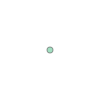

In [13]:
better_health_df1.loc[1,'geometry']

In [14]:
print(better_health_df1.loc[1, 'geometry'])

POINT (-85.3928136383141 31.8698172860413)


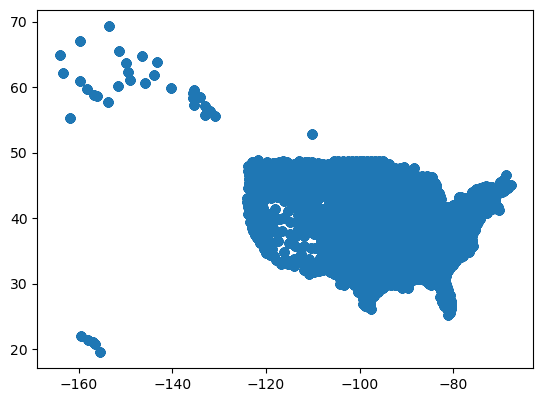

In [15]:
better_health_df1.plot();

In [16]:
better_health_df1.head()

,data_value,short_question_text,statedesc,year,stateabbr,locationname,category,totalpopulation,geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)
3,5.6,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417)
4,5.3,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931)
6,40.3,Short Sleep Duration,Alabama,2022,AL,DeKalb,Health Risk Behaviors,71998,POINT (-85.80397 34.45986)


In [17]:
#better_health_df1_state=better_health_df1.statedesc.value_counts().to_frame().reset_index()
#better_health_df1_state

In [18]:
better_health_df1=better_health_df1.rename(columns={'measure':'Measure','data_value':'Data','short_question_text': 'Category','statedesc':'State', 'totalpop18plus': '18plus', 'year':'Year',
                                  'categoryid':'Category_ID','stateabbr': 'St_Abbr','locationname': 'Location', 'category':'Group',
                                  'totalpopulation':'Population','geometry':'Geometry'})
better_health_df1.head()


,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)
3,5.6,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417)
4,5.3,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931)
6,40.3,Short Sleep Duration,Alabama,2022,AL,DeKalb,Health Risk Behaviors,71998,POINT (-85.80397 34.45986)


In [19]:
better_health_df1.Category.value_counts()

Category
Diabetes                            3145
Hearing Disability                  3145
Stroke                              3145
Short Sleep Duration                3145
Cancer (non-skin) or Melanoma       3145
Frequent Physical Distress          3145
Health Insurance                    3145
Arthritis                           3145
Cognitive Disability                3145
Mobility Disability                 3145
Any Disability                      3145
Depression                          3145
Annual Checkup                      3145
Obesity                             3145
Coronary Heart Disease              3145
Current Asthma                      3145
Vision Disability                   3145
Binge Drinking                      3145
COPD                                3145
Self-care Disability                3145
Mammography                         3145
Current Cigarette Smoking           3145
Dental Visit                        3145
Independent Living Disability       3145
All Tee

In [20]:
better_health_df1['Data']=better_health_df1['Data'].astype(float)
better_health_df1.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)
3,5.6,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417)
4,5.3,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931)
6,40.3,Short Sleep Duration,Alabama,2022,AL,DeKalb,Health Risk Behaviors,71998,POINT (-85.80397 34.45986)


In [21]:
better_health_df1['Population']=better_health_df1['Population'].astype(int)
better_health_df1.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982)
3,5.6,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417)
4,5.3,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931)
6,40.3,Short Sleep Duration,Alabama,2022,AL,DeKalb,Health Risk Behaviors,71998,POINT (-85.80397 34.45986)


In [22]:
better_health_df1['Total'] =((better_health_df1.Population * better_health_df1.Data)/100).astype('int')
better_health_df1.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None,39994506
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982),2371
3,5.6,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417),1908
4,5.3,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931),752
6,40.3,Short Sleep Duration,Alabama,2022,AL,DeKalb,Health Risk Behaviors,71998,POINT (-85.80397 34.45986),29015


In [23]:
better_health_df1_Stroke = better_health_df1.loc[better_health_df1['Category'] == 'Stroke'].reset_index(drop=True).round()
better_health_df1_Stroke.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,6.0,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417),1908
1,5.0,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931),752
2,4.0,Stroke,Arkansas,2022,AR,Crawford,Health Outcomes,61075,POINT (-94.24242 35.58843),2748
3,6.0,Stroke,Arkansas,2022,AR,Monroe,Health Outcomes,6564,POINT (-91.20392 34.67785),420
4,4.0,Stroke,California,2022,CA,Inyo,Health Outcomes,18718,POINT (-117.41111 36.51142),730


In [24]:
better_health_df1_Stroke.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Data        3145 non-null   float64 
 1   Category    3145 non-null   object  
 2   State       3145 non-null   object  
 3   Year        3145 non-null   object  
 4   St_Abbr     3145 non-null   object  
 5   Location    3144 non-null   object  
 6   Group       3145 non-null   object  
 7   Population  3145 non-null   int64   
 8   Geometry    3144 non-null   geometry
 9   Total       3145 non-null   int64   
dtypes: float64(1), geometry(1), int64(2), object(6)
memory usage: 245.8+ KB


In [25]:
#candy_df['Name']=candy_df['Name'].astype(str)
#candy_df.head()
#better_health_df1_Stroke['Data']=better_health_df1_Stroke['Data'].astype(float)
better_health_df1_Stroke_TN = better_health_df1_Stroke.loc[better_health_df1_Stroke.State=='Tennessee'].reset_index(drop = True)
better_health_df1_Stroke_TN.head(51)

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,5.0,Stroke,Tennessee,2022,TN,Bledsoe,Health Outcomes,14798,POINT (-85.20485 35.59673),784
1,5.0,Stroke,Tennessee,2022,TN,Carroll,Health Outcomes,28458,POINT (-88.45022 35.97313),1337
2,5.0,Stroke,Tennessee,2022,TN,Rhea,Health Outcomes,33730,POINT (-84.92436 35.60898),1753
3,4.0,Stroke,Tennessee,2022,TN,Franklin,Health Outcomes,43942,POINT (-86.09187 35.15495),1933
4,5.0,Stroke,Tennessee,2022,TN,Johnson,Health Outcomes,18086,POINT (-81.85198 36.45455),940
5,5.0,Stroke,Tennessee,2022,TN,Gibson,Health Outcomes,50837,POINT (-88.93240 35.99632),2338
6,4.0,Stroke,Tennessee,2022,TN,Cheatham,Health Outcomes,41830,POINT (-87.08660 36.26153),1464
7,4.0,Stroke,Tennessee,2022,TN,Shelby,Health Outcomes,916371,POINT (-89.89409 35.18424),38487
8,4.0,Stroke,Tennessee,2022,TN,Sullivan,Health Outcomes,160820,POINT (-82.30456 36.51293),6593
9,5.0,Stroke,Tennessee,2022,TN,Loudon,Health Outcomes,58181,POINT (-84.31096 35.73515),2676


In [26]:
#better_health_df1_Stroke['Population']=better_health_df1_Stroke['Population'].astype(int)
#better_health_df1_Stroke.head(2)

In [27]:
better_health_df1_Stroke.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 3145 entries, 0 to 3144
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Data        3145 non-null   float64 
 1   Category    3145 non-null   object  
 2   State       3145 non-null   object  
 3   Year        3145 non-null   object  
 4   St_Abbr     3145 non-null   object  
 5   Location    3144 non-null   object  
 6   Group       3145 non-null   object  
 7   Population  3145 non-null   int64   
 8   Geometry    3144 non-null   geometry
 9   Total       3145 non-null   int64   
dtypes: float64(1), geometry(1), int64(2), object(6)
memory usage: 245.8+ KB


In [28]:
Stroke=better_health_df1_Stroke[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0).head(11)
Stroke


,State,Total
1,California,1226481
2,Texas,1000176
3,Florida,912508
4,New York,661298
5,Pennsylvania,475785
6,Ohio,450266
7,Illinois,426399
8,Georgia,408217
9,North Carolina,403943
10,Michigan,368265


In [29]:
better_health_df1_Stroke[better_health_df1_Stroke.State =='United States']

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
149,4.0,Stroke,United States,2022,US,None,Health Outcomes,333287557,None,11998352


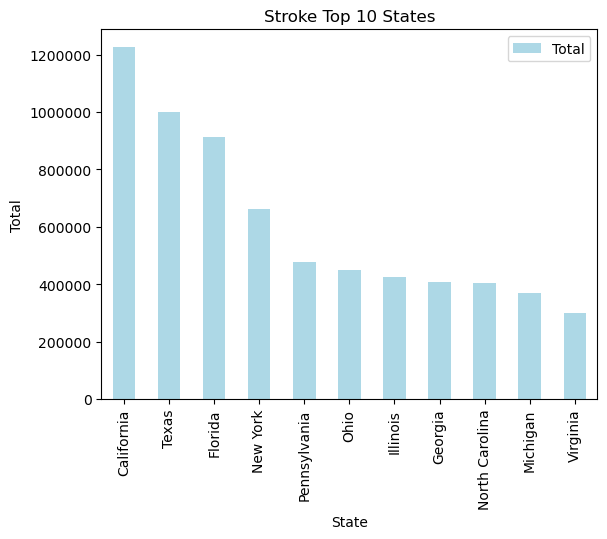

In [30]:
#candy_df_Top_place.plot.bar(x= 'Candy', y='count',color=['red']) ##palette = 'viridis'
#plt.title('The Most Favorite Candy Top Place')
#plt.ylabel ('Count');
Stroke.plot.bar(x= 'State', y='Total', color=['lightblue'])
plt.title('Stroke Top 10 States')
plt.ylabel ('Total') 
plt.ticklabel_format(style='plain', axis='y')
              

In [31]:
better_health_df1_Diabetes = better_health_df1.loc[better_health_df1['Category'] =='Diabetes'].reset_index(drop=True)
better_health_df1_Diabetes.head(11)

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None,39994506
1,17.5,Diabetes,Alabama,2022,AL,Russell,Health Outcomes,58555,POINT (-85.18466 32.28821),10247
2,15.3,Diabetes,Arkansas,2022,AR,Drew,Health Outcomes,16911,POINT (-91.71966 33.58941),2587
3,15.8,Diabetes,Georgia,2022,GA,Burke,Health Outcomes,24388,POINT (-82.00069 33.06134),3853
4,13.7,Diabetes,Georgia,2022,GA,Glascock,Health Outcomes,2939,POINT (-82.61063 33.22973),402
5,10.2,Diabetes,Illinois,2022,IL,Monroe,Health Outcomes,35033,POINT (-90.17751 38.27839),3573
6,14.5,Diabetes,Alabama,2022,AL,Calhoun,Health Outcomes,115788,POINT (-85.82577 33.77149),16789
7,11.7,Diabetes,Iowa,2022,IA,Clay,Health Outcomes,16475,POINT (-95.15112 43.08257),1927
8,9.9,Diabetes,Arizona,2022,AZ,Coconino,Health Outcomes,144060,POINT (-111.77058 35.83879),14261
9,21.4,Diabetes,Alabama,2022,AL,Dallas,Health Outcomes,36767,POINT (-87.10652 32.32583),7868


In [32]:
better_health_df1_Diabetes[better_health_df1_Diabetes.State == "United States"].columns

Index(['Data', 'Category', 'State', 'Year', 'St_Abbr', 'Location', 'Group',
       'Population', 'Geometry', 'Total'],
      dtype='object')

In [33]:
Diabetes = better_health_df1_Diabetes[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0).head(10)
Diabetes.head(10)   


,State,Total
1,California,4484266
2,Texas,4096814
3,Florida,2964747
4,New York,2191458
5,Ohio,1577087
6,Pennsylvania,1500161
7,Illinois,1480750
8,Georgia,1374933
9,North Carolina,1280957
10,Michigan,1134922


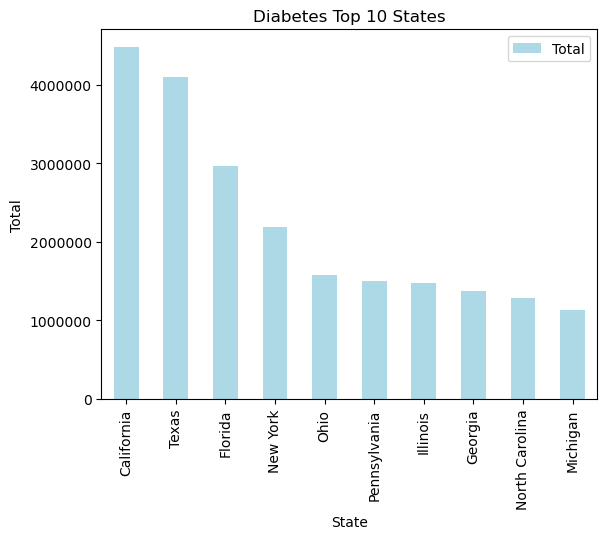

In [34]:
Diabetes.plot.bar(x= 'State', y='Total', color=['lightblue'])
plt.title('Diabetes Top 10 States')
plt.ylabel ('Total') 
plt.ticklabel_format(style='plain', axis='y')

In [35]:
better_health_df1_Cancer = better_health_df1.loc[better_health_df1['Category'] == 'Cancer (non-skin) or Melanoma'].reset_index(drop=True).round()
better_health_df1_Cancer.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,9.0,Cancer (non-skin) or Melanoma,Alabama,2022,AL,Etowah,Health Outcomes,103088,POINT (-86.03493 34.04514),9381
1,9.0,Cancer (non-skin) or Melanoma,Arkansas,2022,AR,Saline,Health Outcomes,127357,POINT (-92.67652 34.64665),11716
2,8.0,Cancer (non-skin) or Melanoma,Alabama,2022,AL,Mobile,Health Outcomes,411411,POINT (-88.20641 30.77917),31678
3,6.0,Cancer (non-skin) or Melanoma,California,2022,CA,Los Angeles,Health Outcomes,9721138,POINT (-118.22455 34.32138),583268
4,8.0,Cancer (non-skin) or Melanoma,Alabama,2022,AL,Dale,Health Outcomes,49544,POINT (-85.61093 31.43166),4112


In [36]:
Cancer = better_health_df1_Cancer[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index()
Cancer.head(11)    

,State,Total
0,United States,27329579
1,California,2630957
2,Florida,2041029
3,Texas,1888815
4,New York,1472875
5,Pennsylvania,1138401
6,Ohio,1020081
7,Illinois,956855
8,Michigan,869942
9,North Carolina,835275


In [37]:
better_health_df1_Obesity = better_health_df1.loc[better_health_df1['Category'] == 'Obesity'].reset_index(drop=True).round()
better_health_df1_Obesity.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,38.0,Obesity,Arkansas,2022,AR,Columbia,Health Outcomes,22216,POINT (-93.22753 33.21441),8553
1,29.0,Obesity,California,2022,CA,Contra Costa,Health Outcomes,1156966,POINT (-121.92733 37.91920),330892
2,25.0,Obesity,California,2022,CA,El Dorado,Health Outcomes,192646,POINT (-120.52458 38.77869),47583
3,27.0,Obesity,California,2022,CA,San Luis Obispo,Health Outcomes,282013,POINT (-120.40448 35.38711),75015
4,31.0,Obesity,Florida,2022,FL,Hillsborough,Health Outcomes,1513301,POINT (-82.30859 27.92930),475176


In [38]:
Obesity = better_health_df1_Obesity[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0).head(10)
Obesity.head(11)   

,State,Total
1,California,11035112
2,Texas,10976012
3,Florida,7181692
4,New York,5898962
5,Ohio,4587535
6,Pennsylvania,4389838
7,Illinois,4313891
8,Georgia,4014053
9,North Carolina,3576877
10,Michigan,3554036


In [39]:
better_health_df1_Arthritis = better_health_df1.loc[better_health_df1['Category'] == 'Arthritis'].reset_index(drop=True).round()
better_health_df1_Arthritis.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,28.0,Arthritis,Alabama,2022,AL,Lee,Health Outcomes,180773,POINT (-85.35504 32.60125),50616
1,39.0,Arthritis,Alabama,2022,AL,Marion,Health Outcomes,29156,POINT (-87.88720 34.13659),11341
2,30.0,Arthritis,Arizona,2022,AZ,Cochise,Health Outcomes,125663,POINT (-109.75138 31.87946),37573
3,38.0,Arthritis,Arkansas,2022,AR,Polk,Health Outcomes,19337,POINT (-94.22822 34.48586),7270
4,40.0,Arthritis,Arkansas,2022,AR,Searcy,Health Outcomes,7918,POINT (-92.69949 35.91113),3175


In [40]:
Arthritis = better_health_df1_Arthritis[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0).head(10)
Arthritis.head(11)   

,State,Total
1,California,8522106
2,Texas,6805605
3,Florida,6293809
4,New York,4677113
5,Pennsylvania,3945048
6,Ohio,3618675
7,Illinois,3267651
8,Michigan,2988790
9,Georgia,2885754
10,North Carolina,2858639


In [41]:
better_health_df1_Depression = better_health_df1.loc[better_health_df1['Category'] == 'Depression'].reset_index(drop=True).round()
better_health_df1_Depression.head()

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,19.0,Depression,Alaska,2022,AK,Yakutat,Health Outcomes,700,POINT (-140.35766 59.88901),130
1,22.0,Depression,Arizona,2022,AZ,Mohave,Health Outcomes,220816,POINT (-113.75810 35.70447),49021
2,26.0,Depression,Arkansas,2022,AR,Carroll,Health Outcomes,28742,POINT (-93.53830 36.34096),7472
3,23.0,Depression,California,2022,CA,Mendocino,Health Outcomes,89783,POINT (-123.39132 39.44031),20739
4,20.0,Depression,California,2022,CA,San Benito,Health Outcomes,67579,POINT (-121.07467 36.60543),13583


In [42]:
Depression = better_health_df1_Depression[['State','Total']].groupby('State')['Total'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index().drop(0).head(10)
Depression.head(11) 

,State,Total
1,California,8030499
2,Texas,6545857
3,Florida,4314403
4,New York,3682820
5,Ohio,2985520
6,Pennsylvania,2985296
7,North Carolina,2409927
8,Michigan,2408741
9,Illinois,2384346
10,Georgia,2223313


In [43]:
#Depression_perc= better_health_df1_Depression[['State','Data']].groupby('State')['Data'].sum().to_frame().sort_values(by='Total', ascending = False).reset_index()
#Depression_perc.head(11) 

In [44]:
better_health_df1_percentage=better_health_df1[['State','Population']]
better_health_df1_percentage=better_health_df1_percentage.drop(0)
better_health_df1_percentage

#better_health_df1[['State','Population']].groupby('State')['Population'].sum().to_frame().sort_values(by='Population', ascending = False).reset_index()

,State,Population
1,Alabama,24706
3,Alabama,34088
4,Alabama,14198
6,Alabama,71998
7,Alabama,103088
...,...,...
240876,Wisconsin,81172
240879,Wisconsin,103836
240881,Wisconsin,45709
240884,Wisconsin,137958


In [45]:
##better_health_df1_percentage.sort_values(by='State', ascending = False) .reset_index()

In [46]:
##better_health_df1_percentage.groupby('State')['Population'].sum().to_frame().sort_values(by='State', ascending = False).reset_index().drop(0)


In [47]:
better_health_df1

,Data,Category,State,Year,St_Abbr,Location,Group,Population,Geometry,Total
0,12.0,Diabetes,United States,2022,US,None,Health Outcomes,333287557,None,39994506
1,9.6,Hearing Disability,Alabama,2022,AL,Barbour,Disability,24706,POINT (-85.39281 31.86982),2371
3,5.6,Stroke,Alabama,2022,AL,Chambers,Health Outcomes,34088,POINT (-85.39176 32.91417),1908
4,5.3,Stroke,Alabama,2022,AL,Clay,Health Outcomes,14198,POINT (-85.86066 33.26931),752
6,40.3,Short Sleep Duration,Alabama,2022,AL,DeKalb,Health Risk Behaviors,71998,POINT (-85.80397 34.45986),29015
...,...,...,...,...,...,...,...,...,...,...
240876,11.5,Diabetes,Wisconsin,2022,WI,Manitowoc,Health Outcomes,81172,POINT (-87.80959 44.11996),9334
240879,3.7,Stroke,Wisconsin,2022,WI,Fond du Lac,Health Outcomes,103836,POINT (-88.48834 43.75361),3841
240881,34.3,High Blood Pressure,Wisconsin,2021,WI,Polk,Health Outcomes,45709,POINT (-92.44128 45.46151),15678
240884,3.2,Self-care Disability,Wisconsin,2022,WI,Marathon,Disability,137958,POINT (-89.75886 44.89830),4414


Q2: - Looking at Excel Spredsheet for NHE

In [48]:

nhe_df = pd.read_csv('../data/Table_1_NHE.csv')
nhe_df.head()

,"Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60
0,Item,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Amount in Billions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7","$2,026.6",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
nhe_df.columns

Index(['Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'U

In [50]:
type(nhe_df)

pandas.core.frame.DataFrame

In [51]:
nhe_df.reset_index

<bound method DataFrame.reset_index of    Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022  \
0                                                Item                                                                                                            
1                                                 NaN                                                                                                            
2                       National Health Expenditures                                                                                                             
3                     Health Consumption Expenditures                                                                                                            
4                                Personal Health Care                                                                                                  

In [52]:
nhe_df.columns

Index(['Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'U

In [53]:
   
nhe_df1 = nhe_df.drop(columns=['Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32','Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
                              'Unnamed: 36','Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42','Unnamed: 43',
                              'Unnamed: 44','Unnamed: 45', 'Unnamed: 46','Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51',
                              'Unnamed: 52','Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59',
                              'Unnamed: 60'])

nhe_df1.head()
    

,"Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,Item,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,NaN,Amount in Billions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7","$2,026.6",...,"$2,783.3","$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0",...,"2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8",...,"2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"


In [54]:

nhe_df1=nhe_df1.rename(columns ={'Table 1 \nNational Health Expenditures; Aggregate and Per Capita Amounts, Annual Percent Change and Percent Distribution: Selected Calendar Years 1960-2022': 'NHE',
       'Unnamed: 1': '1960', 'Unnamed: 2': '1970', 'Unnamed: 3': '1980','Unnamed: 4': '1990', 'Unnamed: 5':'2000',
       'Unnamed: 6':'2001', 'Unnamed: 7':'2002', 'Unnamed: 8':'2003', 'Unnamed: 9':'2004', 'Unnamed: 10':'2005',
       'Unnamed: 11':'2006', 'Unnamed: 12':'2007', 'Unnamed: 13':'2008', 'Unnamed: 14':'2009',
       'Unnamed: 15':'2010', 'Unnamed: 16':'2011', 'Unnamed: 17': '2012', 'Unnamed: 18':'2013',
       'Unnamed: 19':'2014', 'Unnamed: 20':'2015', 'Unnamed: 21':'2016', 'Unnamed: 22':'2017',
       'Unnamed: 23':'2018', 'Unnamed: 24':'2019', 'Unnamed: 25':'2020', 'Unnamed: 26':'2021',
       'Unnamed: 27':'2022'})
nhe_df1.head()


,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Item,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
1,NaN,Amount in Billions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7","$2,026.6",...,"$2,783.3","$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0",...,"2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8",...,"2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"


In [55]:
nhe_df1 = nhe_df1.dropna()
nhe_df1.head()

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Item,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7","$2,026.6",...,"$2,783.3","$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0",...,"2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8",...,"2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,150.0,...,196.7,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6


In [56]:
#df = df.drop([0, 2])
#df.drop(1, inplace=True)
#df.dropna()
#df.drop(1)  # for 1 row

In [57]:
nhe_df1=nhe_df1.drop(0)
nhe_df1.head()

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7","$2,026.6",...,"$2,783.3","$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0",...,"2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8",...,"2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,150.0,...,196.7,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
6,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,57.3,...,77.2,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4


In [58]:
nhe_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 2 to 36
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NHE     21 non-null     object
 1   1960    21 non-null     object
 2   1970    21 non-null     object
 3   1980    21 non-null     object
 4   1990    21 non-null     object
 5   2000    21 non-null     object
 6   2001    21 non-null     object
 7   2002    21 non-null     object
 8   2003    21 non-null     object
 9   2004    21 non-null     object
 10  2005    21 non-null     object
 11  2006    21 non-null     object
 12  2007    21 non-null     object
 13  2008    21 non-null     object
 14  2009    21 non-null     object
 15  2010    21 non-null     object
 16  2011    21 non-null     object
 17  2012    21 non-null     object
 18  2013    21 non-null     object
 19  2014    21 non-null     object
 20  2015    21 non-null     object
 21  2016    21 non-null     object
 22  2017    21 non-null     object
 2

In [59]:
##candy_df['Name']=candy_df['Name'].astype(str)
##candy_df.head()
nhe_df1 = nhe_df1.astype(str)
nhe_df1.head()


,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7","$2,026.6",...,"$2,783.3","$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0",...,"2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8",...,"2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,150.0,...,196.7,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
6,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,57.3,...,77.2,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4


In [60]:
nhe_df1.shape

(21, 28)

In [61]:
type(nhe_df1)

pandas.core.frame.DataFrame

In [62]:
nhe_df1.head()

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7","$2,026.6",...,"$2,783.3","$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0",...,"2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8",...,"2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,150.0,...,196.7,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
6,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,57.3,...,77.2,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4


In [63]:
##pd.set_option('display.max.columns',30)
#df
pd.set_option('display.max.columns', 28)
pd.set_option('display.max.rows', 22)


In [64]:
nhe_df1.head()

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
2,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7","$2,026.6","$2,165.1","$2,305.5","$2,402.4","$2,492.7","$2,589.6","$2,676.5","$2,783.3","$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
3,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0","2,032.1","2,159.3","2,246.1","2,345.5","2,437.5","2,517.8","2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
4,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8","1,806.5","1,921.5","2,007.2","2,105.5","2,180.5","2,253.9","2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
5,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,150.0,164.8,171.9,167.4,165.9,181.4,189.5,196.7,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
6,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,57.3,60.9,66.0,71.6,74.2,75.7,74.4,77.2,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4


In [65]:
##df.reset_index(drop=True, inplace=True)

nhe_df1 = nhe_df1.reset_index(drop=True)
nhe_df1.head()

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,National Health Expenditures,$27.1,$74.1,$253.2,$718.7,"$1,366.0","$1,483.4","$1,631.0","$1,770.4","$1,894.7","$2,026.6","$2,165.1","$2,305.5","$2,402.4","$2,492.7","$2,589.6","$2,676.5","$2,783.3","$2,855.7","$3,001.7","$3,163.8","$3,305.3","$3,443.7","$3,601.2","$3,756.4","$4,156.3","$4,289.1","$4,464.6"
1,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0","2,032.1","2,159.3","2,246.1","2,345.5","2,437.5","2,517.8","2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
2,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8","1,806.5","1,921.5","2,007.2","2,105.5","2,180.5","2,253.9","2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
3,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,150.0,164.8,171.9,167.4,165.9,181.4,189.5,196.7,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
4,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,57.3,60.9,66.0,71.6,74.2,75.7,74.4,77.2,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4


In [66]:
#Get rid off min. in duration column and change into integer
##movies_df['duration']=movies_df.duration.str[:-4].astype(int)

nhe_df1['1960']= nhe_df1['1960'].str.replace('$', '')
nhe_df1['1960']= nhe_df1['1960'].str.replace('%', '')
#nhe_df1['1960'] = nhe_df1['1960'].astype(str)


In [67]:
nhe_df1['1970']= nhe_df1['1970'].str.replace('$', '')
nhe_df1['1970']= nhe_df1['1970'].str.replace('%', '')
##nhe_df1['1970'] = nhe_df1['1970'].astype(int)

In [68]:
nhe_df1['1980']= nhe_df1['1980'].str.replace('$', '')
nhe_df1['1980']= nhe_df1['1980'].str.replace('%', '')

In [69]:
nhe_df1['1990']= nhe_df1['1990'].str.replace('$', '')
nhe_df1['1990']= nhe_df1['1990'].str.replace('%', '')

In [70]:
nhe_df1['2000']= nhe_df1['2000'].str.replace('$', '')
nhe_df1['2000']= nhe_df1['2000'].str.replace('%', '')

In [71]:
nhe_df1['2001']= nhe_df1['2001'].str.replace('$', '')
nhe_df1['2001']= nhe_df1['2001'].str.replace('%', '')

In [72]:
nhe_df1['2002']= nhe_df1['2002'].str.replace('$', '')
nhe_df1['2002']= nhe_df1['2002'].str.replace('%', '')

In [73]:
nhe_df1['2003']= nhe_df1['2003'].str.replace('$', '')
nhe_df1['2003']= nhe_df1['2003'].str.replace('%', '')

In [74]:
nhe_df1['2004']= nhe_df1['2004'].str.replace('$', '')
nhe_df1['2004']= nhe_df1['2004'].str.replace('%', '')

In [75]:
nhe_df1['2005']= nhe_df1['2005'].str.replace('$', '')
nhe_df1['2005']= nhe_df1['2005'].str.replace('%', '')

In [76]:
nhe_df1['2006']= nhe_df1['2006'].str.replace('$', '')
nhe_df1['2006']= nhe_df1['2006'].str.replace('%', '')

In [77]:
nhe_df1['2007']= nhe_df1['2007'].str.replace('$', '')
nhe_df1['2007']= nhe_df1['2007'].str.replace('%', '')

In [78]:
nhe_df1['2008']= nhe_df1['2008'].str.replace('$', '')
nhe_df1['2008']= nhe_df1['2008'].str.replace('%', '')

In [79]:
nhe_df1['2009']= nhe_df1['2009'].str.replace('$', '')
nhe_df1['2009']= nhe_df1['2009'].str.replace('%', '')

In [80]:
nhe_df1['2010']= nhe_df1['2010'].str.replace('$', '')
nhe_df1['2010']= nhe_df1['2010'].str.replace('%', '')

In [81]:
nhe_df1['2011']= nhe_df1['2011'].str.replace('$', '')
nhe_df1['2011']= nhe_df1['2011'].str.replace('%', '')

In [82]:
nhe_df1['2012']= nhe_df1['2012'].str.replace('$', '')
nhe_df1['2012']= nhe_df1['2012'].str.replace('%', '')

In [83]:
nhe_df1['2013']= nhe_df1['2013'].str.replace('$', '')
nhe_df1['2013']= nhe_df1['2013'].str.replace('%', '')

In [84]:
nhe_df1['2014']= nhe_df1['2014'].str.replace('$', '')
nhe_df1['2014']= nhe_df1['2014'].str.replace('%', '')

In [85]:
nhe_df1['2015']= nhe_df1['2015'].str.replace('$', '')
nhe_df1['2015']= nhe_df1['2015'].str.replace('%', '')

In [86]:
nhe_df1['2016']= nhe_df1['2016'].str.replace('$', '')
nhe_df1['2016']= nhe_df1['2016'].str.replace('%', '')

In [87]:
nhe_df1['2017']= nhe_df1['2017'].str.replace('$', '')
nhe_df1['2017']= nhe_df1['2017'].str.replace('%', '')

In [88]:
nhe_df1['2018']= nhe_df1['2018'].str.replace('$', '')
nhe_df1['2018']= nhe_df1['2018'].str.replace('%', '')

In [89]:
nhe_df1['2019']= nhe_df1['2019'].str.replace('$', '')
nhe_df1['2019']= nhe_df1['2019'].str.replace('%', '')

In [90]:
nhe_df1['2020']= nhe_df1['2020'].str.replace('$', '')
nhe_df1['2020']= nhe_df1['2020'].str.replace('%', '')

In [91]:
nhe_df1['2021']= nhe_df1['2021'].str.replace('$', '')
nhe_df1['2021']= nhe_df1['2021'].str.replace('%', '')

In [92]:
nhe_df1['2022']= nhe_df1['2022'].str.replace('$', '')
nhe_df1['2022']= nhe_df1['2022'].str.replace('%', '')

In [93]:
nhe_df1.head()

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,National Health Expenditures,27.1,74.1,253.2,718.7,"1,366.0","1,483.4","1,631.0","1,770.4","1,894.7","2,026.6","2,165.1","2,305.5","2,402.4","2,492.7","2,589.6","2,676.5","2,783.3","2,855.7","3,001.7","3,163.8","3,305.3","3,443.7","3,601.2","3,756.4","4,156.3","4,289.1","4,464.6"
1,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0","2,032.1","2,159.3","2,246.1","2,345.5","2,437.5","2,517.8","2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
2,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8","1,806.5","1,921.5","2,007.2","2,105.5","2,180.5","2,253.9","2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
3,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,150.0,164.8,171.9,167.4,165.9,181.4,189.5,196.7,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
4,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,57.3,60.9,66.0,71.6,74.2,75.7,74.4,77.2,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4


In [94]:
#df_reset = df.reset_index(drop=True)
nhe_df1=nhe_df1.reset_index(drop=True)
nhe_df1.head()

,NHE,1960,1970,1980,1990,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,National Health Expenditures,27.1,74.1,253.2,718.7,"1,366.0","1,483.4","1,631.0","1,770.4","1,894.7","2,026.6","2,165.1","2,305.5","2,402.4","2,492.7","2,589.6","2,676.5","2,783.3","2,855.7","3,001.7","3,163.8","3,305.3","3,443.7","3,601.2","3,756.4","4,156.3","4,289.1","4,464.6"
1,Health Consumption Expenditures,24.6,66.3,232.7,670.2,"1,280.3","1,393.4","1,529.6","1,661.8","1,777.8","1,901.0","2,032.1","2,159.3","2,246.1","2,345.5","2,437.5","2,517.8","2,620.1","2,692.6","2,842.2","3,000.6","3,139.1","3,263.0","3,411.6","3,562.3","3,962.2","4,081.6","4,246.8"
2,Personal Health Care,23.1,62.4,214.3,611.9,"1,156.5","1,256.5","1,365.5","1,475.9","1,582.4","1,693.8","1,806.5","1,921.5","2,007.2","2,105.5","2,180.5","2,253.9","2,346.2","2,404.6","2,526.2","2,672.9","2,793.7","2,901.3","3,017.1","3,171.2","3,375.3","3,561.5","3,704.8"
3,Government Administration and Net...,1.1,2.6,11.9,38.3,80.7,90.1,111.9,131.7,140.4,150.0,164.8,171.9,167.4,165.9,181.4,189.5,196.7,206.6,231.5,242.2,255.5,266.3,295.1,282.8,345.1,309.5,333.6
4,Government Public Health Activities,0.4,1.4,6.4,20.0,43.0,46.8,52.2,54.2,54.9,57.3,60.9,66.0,71.6,74.2,75.7,74.4,77.2,81.5,84.4,85.5,90.0,95.5,99.4,108.4,241.9,210.6,208.4


In [95]:
nhe_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NHE     21 non-null     object
 1   1960    21 non-null     object
 2   1970    21 non-null     object
 3   1980    21 non-null     object
 4   1990    21 non-null     object
 5   2000    21 non-null     object
 6   2001    21 non-null     object
 7   2002    21 non-null     object
 8   2003    21 non-null     object
 9   2004    21 non-null     object
 10  2005    21 non-null     object
 11  2006    21 non-null     object
 12  2007    21 non-null     object
 13  2008    21 non-null     object
 14  2009    21 non-null     object
 15  2010    21 non-null     object
 16  2011    21 non-null     object
 17  2012    21 non-null     object
 18  2013    21 non-null     object
 19  2014    21 non-null     object
 20  2015    21 non-null     object
 21  2016    21 non-null     object
 22  2017    21 non-null     obje

In [96]:
##If you want to change the shape of your table, use Transpose :)
nhe_df1_r=nhe_df1.T
nhe_df1_r

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
NHE,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \...
1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [97]:
nhe_df1_r.columns=nhe_df1_r.iloc[0]


In [98]:
nhe_df1_r

NHE,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
NHE,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net...,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \...
1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [99]:
nhe_df1_r=nhe_df1_r.iloc[1:].reset_index()
nhe_df1_r

NHE,index,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
0,1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1,1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
2,1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
3,1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
4,2000,"1,366.0","1,280.3","1,156.5",80.7,43.0,85.7,282,"10,251.0",100.0,93.7,84.7,5.9,3.2,6.3,"4,845","4,541","4,102",286,153,304,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
23,2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
24,2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
25,2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [100]:
nhe_df1_r=nhe_df1_r.rename(columns ={'index':'Year'})
nhe_df1_r

NHE,Year,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
0,1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1,1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
2,1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
3,1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
4,2000,"1,366.0","1,280.3","1,156.5",80.7,43.0,85.7,282,"10,251.0",100.0,93.7,84.7,5.9,3.2,6.3,"4,845","4,541","4,102",286,153,304,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
23,2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
24,2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
25,2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [101]:
nhe_df1_r

NHE,Year,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
0,1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1,1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
2,1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
3,1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
4,2000,"1,366.0","1,280.3","1,156.5",80.7,43.0,85.7,282,"10,251.0",100.0,93.7,84.7,5.9,3.2,6.3,"4,845","4,541","4,102",286,153,304,13.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,2018,"3,601.2","3,411.6","3,017.1",295.1,99.4,189.6,327,"20,656.5",100.0,94.7,83.8,8.2,2.8,5.3,"11,030","10,449","9,241",904,304,581,17.4
23,2019,"3,756.4","3,562.3","3,171.2",282.8,108.4,194.0,328,"21,521.4",100.0,94.8,84.4,7.5,2.9,5.2,"11,453","10,862","9,669",862,330,592,17.5
24,2020,"4,156.3","3,962.2","3,375.3",345.1,241.9,194.2,329,"21,323.0",100.0,95.3,81.2,8.3,5.8,4.7,"12,629","12,039","10,255","1,048",735,590,19.5
25,2021,"4,289.1","4,081.6","3,561.5",309.5,210.6,207.5,330,"23,594.0",100.0,95.2,83.0,7.2,4.9,4.8,"13,012","12,383","10,805",939,639,629,18.2


In [102]:
pd.set_option('display.max.columns', 22)
pd.set_option('display.max.rows', 27)

In [103]:
nhe_df1_r

NHE,Year,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,U.S. Population1,Gross Domestic Product2,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures,Health Consumption Expenditures,Personal Health Care,Government Administration and Net Cost of Health Insurance,Government Public Health Activities,Investment,National Health Expenditures as a Percent of \n Gross Domestic Product
0,1960,27.1,24.6,23.1,1.1,0.4,2.6,186,542.4,100.0,90.5,85.3,3.9,1.4,9.5,146,132,124,6,2,14,5.0
1,1970,74.1,66.3,62.4,2.6,1.4,7.7,210,"1,073.3",100.0,89.5,84.2,3.5,1.8,10.5,353,316,297,12,6,37,6.9
2,1980,253.2,232.7,214.3,11.9,6.4,20.6,230,"2,857.3",100.0,91.9,84.6,4.7,2.5,8.1,"1,099","1,010",930,52,28,89,8.9
3,1990,718.7,670.2,611.9,38.3,20.0,48.6,254,"5,963.1",100.0,93.2,85.1,5.3,2.8,6.8,"2,835","2,643","2,413",151,79,192,12.1
4,2000,"1,366.0","1,280.3","1,156.5",80.7,43.0,85.7,282,"10,251.0",100.0,93.7,84.7,5.9,3.2,6.3,"4,845","4,541","4,102",286,153,304,13.3
5,2001,"1,483.4","1,393.4","1,256.5",90.1,46.8,90.0,285,"10,581.9",100.0,93.9,84.7,6.1,3.2,6.1,"5,213","4,897","4,415",317,164,316,14.0
6,2002,"1,631.0","1,529.6","1,365.5",111.9,52.2,101.5,287,"10,929.1",100.0,93.8,83.7,6.9,3.2,6.2,"5,680","5,327","4,755",390,182,353,14.9
7,2003,"1,770.4","1,661.8","1,475.9",131.7,54.2,108.6,290,"11,456.5",100.0,93.9,83.4,7.4,3.1,6.1,"6,114","5,739","5,097",455,187,375,15.5
8,2004,"1,894.7","1,777.8","1,582.4",140.4,54.9,116.9,292,"12,217.2",100.0,93.8,83.5,7.4,2.9,6.2,"6,483","6,083","5,415",481,188,400,15.5
9,2005,"2,026.6","1,901.0","1,693.8",150.0,57.3,125.5,295,"13,039.2",100.0,93.8,83.6,7.4,2.8,6.2,"6,872","6,446","5,744",509,194,426,15.5


In [104]:
#transpose DataFrame without index
#df.set_index('team').T
##nhe_df1_r.set_index(0).T

NHE grew 4.1% to $4.5 trillion in 2022, or $13,493 per person, and accounted for 17.3% of Gross Domestic Product (GDP). (show the table)

In [105]:
pd.set_option('display.max.columns', 21)
pd.set_option('display.max.rows', 28)

Q3:Note for myself: “In 2022-2023, the number of students ages 3–21 who received special education services under the Individuals with Disabilities Education Act (IDEA) was 7.2 million, or 15 percent of all public school students. Among students receiving special education services, the most common category of disability was specific learning disabilities (32 percent).” Is there a correlation with the first data (diabetes versus learning diabilities)?

Note for myself: 
“In 2020–21, the number of students ages 3–21 who received special education services under the Individuals with Disabilities Education Act (IDEA) was 7.2 million, or 15 percent of all public school students. Among students receiving special education services, the most common category of disability was specific learning disabilities (33 percent).”
Is there a correlation with the first data (diabetes versus learning diabilities)?


In [106]:
kids_df = pd.read_csv('../data/kids_2022.csv')
kids_df

,Extraction Date:,8/30/2023,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
0,Updated:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Revised:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Year,State Name,SEA Education Environment,SEA Disability Category,Age 3,Age 4,Age 5 (Early Childhood),American Indian or Alaska Native - Early Child...,Asian - Early Childhood,Black or African American - Early Childhood,...,EL No - School Age,Female - School Age,Male - School Age,American Indian or Alaska Native - School Age,Asian - School Age,Black or African American - School Age,Hispanic/Latino - School Age,Native Hawaiian or Other Pacific Islander - Sc...,Two or more races - School Age,White - School Age
4,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,-,-,...,26,2,24,0,0,21,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16231,-------------------,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16232,- Data not available,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16233,x Data suppressed due to small cell size,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
kids_df=kids_df.dropna()
kids_df

,Extraction Date:,8/30/2023,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52
3,Year,State Name,SEA Education Environment,SEA Disability Category,Age 3,Age 4,Age 5 (Early Childhood),American Indian or Alaska Native - Early Child...,Asian - Early Childhood,Black or African American - Early Childhood,...,EL No - School Age,Female - School Age,Male - School Age,American Indian or Alaska Native - School Age,Asian - School Age,Black or African American - School Age,Hispanic/Latino - School Age,Native Hawaiian or Other Pacific Islander - Sc...,Two or more races - School Age,White - School Age
4,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,-,-,...,26,2,24,0,0,21,1,0,0,4
5,2022,Alabama,Home,All Disabilities,52,60,6,1,1,21,...,-,-,-,-,-,-,-,-,-,-
6,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,-,-,...,409,151,268,1,9,165,26,0,10,208
7,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,-,-,...,6032,2004,4332,33,79,2497,502,5,235,2985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16225,2022,"US, Outlying Areas, and Freely Associated States",Services in Other Location than Regular Early ...,Visual impairment,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
16226,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
16227,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
16228,2022,"US, Outlying Areas, and Freely Associated States","Total, Early Childhood",Visual impairment,539,651,190,18,39,131,...,-,-,-,-,-,-,-,-,-,-


In [108]:
kids_df['Unnamed: 2'].value_counts()

Unnamed: 2
Correctional Facilities                                                                        854
Home                                                                                           854
Homebound/Hospital                                                                             854
Inside regular class 40% through 79% of the day                                                854
Separate School, School Age                                                                    854
Inside regular class 80% or more of the day                                                    854
Inside regular class less than 40% of the day                                                  854
Parentally Placed in Private Schools                                                           854
Residential Facility, Early Childhood                                                          854
Residential Facility, School Age                                                               854

In [109]:
pd.set_option('display.max.columns', 53)
#pd.set_option('display.max.rows', 22)

In [110]:
kids_df1=kids_df.drop(columns=['Unnamed: 4','Unnamed: 5','Unnamed: 6', 'Unnamed: 7','Unnamed: 8',
                               'Unnamed: 9','Unnamed: 10','Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 6',  'Unnamed: 16',
                               'Unnamed: 19', 'Unnamed: 20','Unnamed: 21','Unnamed: 22', 'Unnamed: 23','Unnamed: 24','Unnamed: 25',
                               'Unnamed: 26','Unnamed: 27','Unnamed: 28','Unnamed: 29','Unnamed: 30','Unnamed: 31','Unnamed: 32',
                               'Unnamed: 33','Unnamed: 34','Unnamed: 35','Unnamed: 36','Unnamed: 37','Unnamed: 38','Unnamed: 42',
                               'Unnamed: 43','Unnamed: 44','Unnamed: 45','Unnamed: 46','Unnamed: 47','Unnamed: 48',
                               'Unnamed: 49','Unnamed: 50','Unnamed: 51','Unnamed: 52',])
kids_df1

,Extraction Date:,8/30/2023,Unnamed: 2,Unnamed: 3,Unnamed: 14,Unnamed: 15,Unnamed: 17,Unnamed: 18,Unnamed: 39,Unnamed: 40,Unnamed: 41
3,Year,State Name,SEA Education Environment,SEA Disability Category,Female - Early Childhood,Male - Early Childhood,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
4,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
5,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
6,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
7,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
...,...,...,...,...,...,...,...,...,...,...,...
16225,2022,"US, Outlying Areas, and Freely Associated States",Services in Other Location than Regular Early ...,Visual impairment,-,-,-,41,-,-,-
16226,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,474,-,-,-
16227,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,65,-,-,-
16228,2022,"US, Outlying Areas, and Freely Associated States","Total, Early Childhood",Visual impairment,-,-,-,1380,-,-,-


In [111]:
kids_df1=kids_df1.rename(columns = { 'Unnamed: 2':'Place','Extraction Date:':'Year','8/30/2023':'State','Unnamed: 3':'Category','Unnamed: 14':'Early Childhood F',
                                    'Unnamed: 15':'Early Childhood M','Unnamed: 17':'EL No - Early Childhood',
                                    'Unnamed: 18':'Age 3 to 5 (Early Childhood)','Unnamed: 39':'Age 18-21', 
                                    'Unnamed: 40': 'Age 5 (School Age)-21','Unnamed: 41':'Ages 6-21'}) 
kids_df1


,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
3,Year,State Name,SEA Education Environment,SEA Disability Category,Female - Early Childhood,Male - Early Childhood,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
4,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
5,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
6,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
7,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
...,...,...,...,...,...,...,...,...,...,...,...
16225,2022,"US, Outlying Areas, and Freely Associated States",Services in Other Location than Regular Early ...,Visual impairment,-,-,-,41,-,-,-
16226,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,474,-,-,-
16227,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,65,-,-,-
16228,2022,"US, Outlying Areas, and Freely Associated States","Total, Early Childhood",Visual impairment,-,-,-,1380,-,-,-


In [112]:
#candy_df_top_state = candy_df.loc[candy_df['Name']=='Hawaii']
#candy_df_top_state
kids_df1_Iowa = kids_df1.loc[kids_df1['State'] == 'Iowa']
kids_df1_Iowa

#pd.set_option('display.max.columns', 22)
#pd.set_option('display.max.rows', 267)


,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
5058,2022,Iowa,Correctional Facilities,All Disabilities,-,-,-,-,45,223,223
5059,2022,Iowa,Home,All Disabilities,9,22,30,31,-,-,-
5060,2022,Iowa,Homebound/Hospital,All Disabilities,-,-,-,-,1,15,15
5061,2022,Iowa,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,548,10609,10455
5062,2022,Iowa,Inside regular class 80% or more of the day,All Disabilities,-,-,-,-,1243,49857,47413
...,...,...,...,...,...,...,...,...,...,...,...
5319,2022,Iowa,Services in Other Location than Regular Early ...,Visual impairment,-,-,-,*,-,-,-
5320,2022,Iowa,Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,*,-,-,-
5321,2022,Iowa,Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,*,-,-,-
5322,2022,Iowa,"Total, Early Childhood",Visual impairment,-,-,-,*,-,-,-


In [113]:
kids_df1.shape

(16227, 11)

In [114]:
kids_df1 = kids_df1.reset_index(drop=True)
kids_df1

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,Year,State Name,SEA Education Environment,SEA Disability Category,Female - Early Childhood,Male - Early Childhood,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
1,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
2,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
3,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
4,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
...,...,...,...,...,...,...,...,...,...,...,...
16222,2022,"US, Outlying Areas, and Freely Associated States",Services in Other Location than Regular Early ...,Visual impairment,-,-,-,41,-,-,-
16223,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,474,-,-,-
16224,2022,"US, Outlying Areas, and Freely Associated States",Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,65,-,-,-
16225,2022,"US, Outlying Areas, and Freely Associated States","Total, Early Childhood",Visual impairment,-,-,-,1380,-,-,-


In [115]:
kids_df1 = kids_df1.drop(0)
kids_df1.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
1,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
2,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
3,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
4,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
5,2022,Alabama,Inside regular class 80% or more of the day,All Disabilities,-,-,-,-,2991,78723,75905


In [116]:
kids_df1.columns

Index(['Year', 'State', 'Place', 'Category', 'Early Childhood F',
       'Early Childhood M', 'EL No - Early Childhood',
       'Age 3 to 5 (Early Childhood)', 'Age 18-21', 'Age 5 (School Age)-21',
       'Ages 6-21'],
      dtype='object')

In [117]:
#kids_df1['Category']= kids_df1['Category'].astype(int)
#kids_df1

In [118]:
kids_df1.shape

(16226, 11)

In [119]:
kids_df1.Category.value_counts()

Category
All Disabilities                 1159
Autism                           1159
Deaf-blindness                   1159
Developmental delay              1159
Emotional disturbance            1159
Hearing impairment               1159
Intellectual disability          1159
Multiple disabilities            1159
Orthopedic impairment            1159
Other health impairment          1159
Specific learning disability     1159
Speech or language impairment    1159
Traumatic brain injury           1159
Visual impairment                1159
Name: count, dtype: int64

In [120]:
#candy_df_by_state = candy_df[['Name', 'Total_pounds']].sort_values(by='Total_pounds',ascending=False)
#candy_df_by_state

In [121]:
type(kids_df1)

pandas.core.frame.DataFrame

In [122]:
#pd1.type=="Movie"
kids_df1.Category== 'Specific learning disability'

1        False
2        False
3        False
4        False
5        False
         ...  
16222    False
16223    False
16224    False
16225    False
16226    False
Name: Category, Length: 16226, dtype: bool

In [123]:
#pd1.loc[pd1['type']== 'Movie']
kids_df1_LD = kids_df1.loc[kids_df1['Category']=='Specific learning disability'].reset_index(drop=True)
kids_df1_LD.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,2022,Alabama,Correctional Facilities,Specific learning disability,-,-,-,-,15,19,-
1,2022,Alabama,Home,Specific learning disability,-,-,-,0,-,-,-
2,2022,Alabama,Homebound/Hospital,Specific learning disability,-,-,-,-,13,69,-
3,2022,Alabama,Inside regular class 40% through 79% of the day,Specific learning disability,-,-,-,-,52,1335,-
4,2022,Alabama,Inside regular class 80% or more of the day,Specific learning disability,-,-,-,-,1958,38043,-


In [124]:
kids_df1_LD=kids_df1_LD.rename(columns ={'Age 5 (School Age)-21':'Age 5-21'})
kids_df1_LD.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5-21,Ages 6-21
0,2022,Alabama,Correctional Facilities,Specific learning disability,-,-,-,-,15,19,-
1,2022,Alabama,Home,Specific learning disability,-,-,-,0,-,-,-
2,2022,Alabama,Homebound/Hospital,Specific learning disability,-,-,-,-,13,69,-
3,2022,Alabama,Inside regular class 40% through 79% of the day,Specific learning disability,-,-,-,-,52,1335,-
4,2022,Alabama,Inside regular class 80% or more of the day,Specific learning disability,-,-,-,-,1958,38043,-


In [125]:

pd.set_option('display.max.columns', 11)
#pd.set_option('display.max.rows', 1160)



In [126]:
#movies_released = movies_df.loc[movies_df.rating=='G'].groupby(['release_year']).title.count().sort_values(ascending=False).head()
#movies_released
kids_df2_LD = kids_df1_LD.Place.value_counts().to_frame().reset_index()
kids_df2_LD

,Place,count
0,Correctional Facilities,61
1,Home,61
2,Homebound/Hospital,61
3,Inside regular class 40% through 79% of the day,61
4,Inside regular class 80% or more of the day,61
5,Inside regular class less than 40% of the day,61
6,Parentally Placed in Private Schools,61
7,"Residential Facility, Early Childhood",61
8,"Residential Facility, School Age",61
9,Separate Class,61


In [127]:
kids_df1.State.unique()

array(['Alabama', 'Alaska', 'American Samoa', 'Arizona', 'Arkansas',
       'Bureau of Indian Education', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia',
       'Federated States of Micronesia', 'Florida', 'Georgia', 'Guam',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas',
       'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana',
       'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico',
       'New York', 'North Carolina', 'North Dakota', 'Northern Marianas',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico',
       'Republic of Palau', 'Republic of the Marshall Islands',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming',
       'US, Outlying Areas, and Freely Associated State

In [128]:
kids_df1_Total = kids_df1.loc[kids_df1['Place']=='Total, School Age'].reset_index(drop=True)
kids_df1_Total.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,2022,Alabama,"Total, School Age",All Disabilities,-,-,-,-,4482,95252,91686
1,2022,Alabama,"Total, School Age",Autism,-,-,-,-,-,10185,-
2,2022,Alabama,"Total, School Age",Deaf-blindness,-,-,-,-,-,14,-
3,2022,Alabama,"Total, School Age",Developmental delay,-,-,-,-,-,3927,-
4,2022,Alabama,"Total, School Age",Emotional disturbance,-,-,-,-,-,1127,-


In [129]:
kids_df1_Total.shape

(854, 11)

In [130]:
kids_df1_Total_by_State = kids_df1_Total.loc[kids_df1_Total['Category']=='Specific learning disability'].reset_index(drop=True)
kids_df1_Total_by_State


,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,2022,Alabama,"Total, School Age",Specific learning disability,-,-,-,-,-,39755,-
1,2022,Alaska,"Total, School Age",Specific learning disability,-,-,-,-,-,6959,-
2,2022,American Samoa,"Total, School Age",Specific learning disability,-,-,-,-,-,355,-
3,2022,Arizona,"Total, School Age",Specific learning disability,-,-,-,-,-,55145,-
4,2022,Arkansas,"Total, School Age",Specific learning disability,-,-,-,-,-,20179,-
...,...,...,...,...,...,...,...,...,...,...,...
56,2022,Washington,"Total, School Age",Specific learning disability,-,-,-,-,-,44716,-
57,2022,West Virginia,"Total, School Age",Specific learning disability,-,-,-,-,-,15548,-
58,2022,Wisconsin,"Total, School Age",Specific learning disability,-,-,-,-,-,25168,-
59,2022,Wyoming,"Total, School Age",Specific learning disability,-,-,-,-,-,4473,-


Note to myself: Start making a graph with specific numbers to how Specific Learning Disability by State

In [131]:
kids_df1_Total_by_State.columns

Index(['Year', 'State', 'Place', 'Category', 'Early Childhood F',
       'Early Childhood M', 'EL No - Early Childhood',
       'Age 3 to 5 (Early Childhood)', 'Age 18-21', 'Age 5 (School Age)-21',
       'Ages 6-21'],
      dtype='object')

In [132]:
##candy_df = candy_df.drop(columns=['Unnamed: 0'])
##candy_df_by_state = candy_df[['Name', 'Total_pounds']].sort_values(by='Total_pounds',ascending=False)
##candy_df_by_state

kids_df1_Total_by_State=kids_df1_Total_by_State[['State', 'Age 5 (School Age)-21']]
kids_df1_Total_by_State


,State,Age 5 (School Age)-21
0,Alabama,39755
1,Alaska,6959
2,American Samoa,355
3,Arizona,55145
4,Arkansas,20179
...,...,...
56,Washington,44716
57,West Virginia,15548
58,Wisconsin,25168
59,Wyoming,4473


In [133]:
#candy_df=candy_df.rename(columns={'name':'Name'})
kids_df1_Total_by_State=kids_df1_Total_by_State.rename(columns={'Age 5 (School Age)-21':'School Age:(5-21)'})
kids_df1_Total_by_State

,State,School Age:(5-21)
0,Alabama,39755
1,Alaska,6959
2,American Samoa,355
3,Arizona,55145
4,Arkansas,20179
...,...,...
56,Washington,44716
57,West Virginia,15548
58,Wisconsin,25168
59,Wyoming,4473


In [134]:
#pd.set_option('display.max.columns', 22)
pd.set_option('display.max.rows', 61)

Iowa does not have data on Learning Disabilities or any other categories... 

In [135]:
kids_df1_Iowa = kids_df1.loc[kids_df1['State'] == 'Iowa']
kids_df1_Iowa

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
5055,2022,Iowa,Correctional Facilities,All Disabilities,-,-,-,-,45,223,223
5056,2022,Iowa,Home,All Disabilities,9,22,30,31,-,-,-
5057,2022,Iowa,Homebound/Hospital,All Disabilities,-,-,-,-,1,15,15
5058,2022,Iowa,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,548,10609,10455
5059,2022,Iowa,Inside regular class 80% or more of the day,All Disabilities,-,-,-,-,1243,49857,47413
...,...,...,...,...,...,...,...,...,...,...,...
5316,2022,Iowa,Services in Other Location than Regular Early ...,Visual impairment,-,-,-,*,-,-,-
5317,2022,Iowa,Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,*,-,-,-
5318,2022,Iowa,Services in Regular Early Childhood Program (a...,Visual impairment,-,-,-,*,-,-,-
5319,2022,Iowa,"Total, Early Childhood",Visual impairment,-,-,-,*,-,-,-


In [136]:
kids_df1_Total_by_State.shape

(61, 2)

In [137]:
kids_df1_Total_by_State

,State,School Age:(5-21)
0,Alabama,39755
1,Alaska,6959
2,American Samoa,355
3,Arizona,55145
4,Arkansas,20179
5,Bureau of Indian Education,2747
6,California,279110
7,Colorado,43224
8,Connecticut,31080
9,Delaware,10787


In [138]:
kids_df1=kids_df1.reset_index(drop=True)
kids_df1.head()

,Year,State,Place,Category,Early Childhood F,Early Childhood M,EL No - Early Childhood,Age 3 to 5 (Early Childhood),Age 18-21,Age 5 (School Age)-21,Ages 6-21
0,2022,Alabama,Correctional Facilities,All Disabilities,-,-,-,-,17,26,26
1,2022,Alabama,Home,All Disabilities,33,85,118,118,-,-,-
2,2022,Alabama,Homebound/Hospital,All Disabilities,-,-,-,-,57,419,413
3,2022,Alabama,Inside regular class 40% through 79% of the day,All Disabilities,-,-,-,-,326,6336,6083
4,2022,Alabama,Inside regular class 80% or more of the day,All Disabilities,-,-,-,-,2991,78723,75905


In [139]:
type(kids_df1)

pandas.core.frame.DataFrame

In [140]:
type(nhe_df1_r)

pandas.core.frame.DataFrame

In [141]:
kids_df1['Category'].value_counts()

Category
All Disabilities                 1159
Autism                           1159
Deaf-blindness                   1159
Developmental delay              1159
Emotional disturbance            1159
Hearing impairment               1159
Intellectual disability          1159
Multiple disabilities            1159
Orthopedic impairment            1159
Other health impairment          1159
Specific learning disability     1159
Speech or language impairment    1159
Traumatic brain injury           1159
Visual impairment                1159
Name: count, dtype: int64